# 🧬 Benign vs Malignant Findings

## 📋 Summary
This note outlines the clinical differences between **benign** and **malignant** findings, specifically in breast and lung evaluations.

---

## ✅ Benign Findings

- **Growth Pattern:** Non-invasive, localized
- **Borders:** Well-defined, smooth margins
- **Growth Rate:** Slow-growing or stable over time
- **Symptoms:** Often asymptomatic
- **Histology:** Normal cellular architecture, no atypia
- **Examples:**
  - **Breast:** Fibroadenoma, cyst, fibrocystic changes
  - **Lung:** Granuloma, hamartoma, post-inflammatory scar

> 💡 **Impression (Example):**  
> *No suspicious mass, distortion, or abnormal calcifications. Findings consistent with benign etiology. Routine follow-up recommended.*

---

## ⚠️ Malignant Findings

- **Growth Pattern:** Invasive, potential to spread (metastasis)
- **Borders:** Irregular, spiculated or ill-defined
- **Growth Rate:** Rapid progression
- **Symptoms:** May include pain, weight loss, cough, bleeding
- **Histology:** Atypical cells, mitotic activity, abnormal nuclei
- **Examples:**
  - **Breast:** Invasive ductal carcinoma, lobular carcinoma
  - **Lung:** Adenocarcinoma, squamous cell carcinoma, small cell carcinoma

> 🚨 **Impression (Example):**  
> *Spiculated mass in the upper outer quadrant with associated lymphadenopathy. Findings suspicious for malignancy. Biopsy recommended.*
🩺 Breast Lump Classification: Benign vs Malignant

📘 Summary

This project explores the classification of breast tumors into benign (non-cancerous) and malignant (cancerous) types using machine learning models. The goal is to identify which algorithm best predicts tumor type based on various diagnostic features.



![Malignant vs Benign](m,alivsbenign.png)
![Malignant vs Benign](malignant_vs_benign.png)
![Malignant vs Benign](benign.jpg)
![Malignant vs Benign](benignn.jpg)
![Malignant vs Benign](signs.jpg)
![Malignant vs Benign](bennign1.png)
![Malignant vs Benign](final.jpg)


# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, ConfusionMatrixDisplay,recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle



**READING IN THE DATASET**

In [2]:
df = pd.read_csv(r'C:\Users\USER\Desktop\breast-cancer.csv')
df


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [72]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**SHAPE OF DATASET**


In [9]:
df.shape


(569, 32)

**DISTRIBUTION OF TARGET COLUMN**

In [73]:
df['diagnosis'].value_counts(normalize=True)


diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

**MAPPING TARGET COLUMN TO INT DATA TYPE**

In [6]:
df['diagnosis'] = df['diagnosis'].map({'B':0, 'M':1})


**CORRELATION MATRIX**

<Axes: >

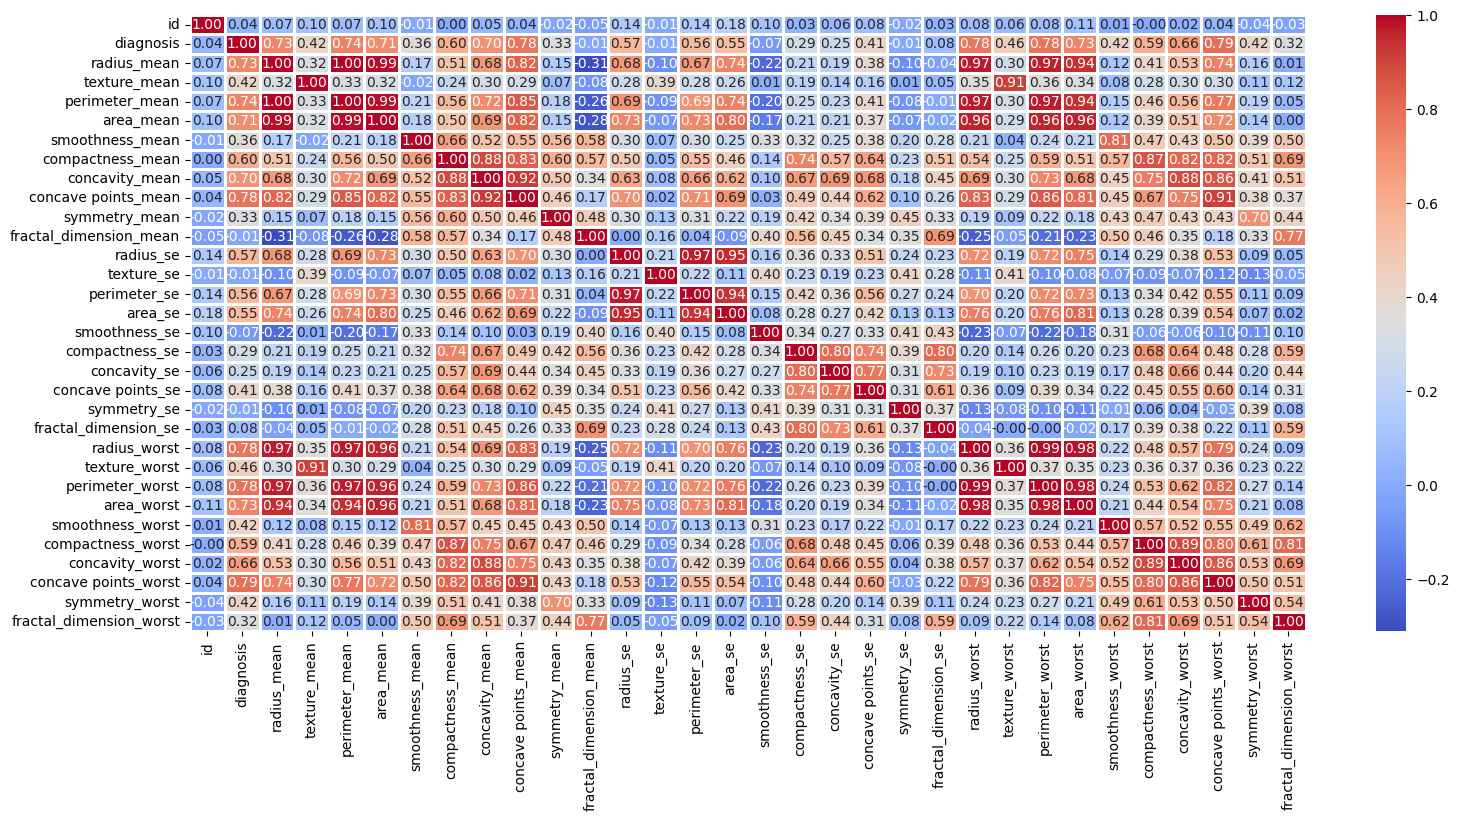

In [13]:
dcorr = df.corr()
plt.figure(figsize=(18, 8))
sns.heatmap(dcorr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.8)


**SPLITTING THE DATASET**

In [7]:
X = df[[
    'concave points_worst',
    'concave points_mean',
    'radius_worst',
    'perimeter_mean',
    'area_worst',
    'area_mean',
    'radius_mean',
    'perimeter_worst',
    'concavity_mean',
    'concavity_worst'
]] # predictor variables
y = df['diagnosis']   # target variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42) # splitting the training and testing set


print(X.shape)
print(y.shape)
X_train.head()



(569, 10)
(569,)


,concave points_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,area_mean,radius_mean,perimeter_worst,concavity_mean,concavity_worst
78,0.2508,0.16040,23.37,143.70,1623.0,1245.0,20.18,170.30,0.37540,0.7681
330,0.1981,0.07041,18.76,105.80,1070.0,793.2,16.03,124.30,0.12040,0.4956
378,0.1054,0.02471,14.54,88.27,657.0,580.6,13.66,97.96,0.04249,0.2569
213,0.1099,0.06597,18.07,114.50,1021.0,948.0,17.42,120.40,0.16820,0.2803
89,0.1397,0.07064,16.34,95.77,803.6,651.9,14.64,109.40,0.09966,0.2604


**DUE TO SOMEW OF THE MODEL ARE SENSITIVE I DECIDED TO SCALE THE DATASET USING STANDARD SCALER**

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pickle.dump(scaler, open('scaler.pkl', 'wb'))  # saving the scaler model


**IMPLEMENTED 4 DIFFERENT MODELS TO CHECK WHICH MODEL IS BEST**

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# --------------------------------------------------------------
#  Logistic Regression
# --------------------------------------------------------------
lr = LogisticRegression(
    penalty='l2',             # Regularization type
    C=1.0,                    # Regularization strength
    solver='lbfgs',           # Optimization algorithm
    max_iter=1000,            # Max iterations for convergence
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)

# --------------------------------------------------------------
#  K-Nearest Neighbors
# --------------------------------------------------------------
knn = KNeighborsClassifier(
    n_neighbors=7,            # Number of neighbors
    weights='uniform',        # Weight function ('uniform' or 'distance')
    algorithm='auto',         # Algorithm to compute nearest neighbors
    leaf_size=30,             # Leaf size for tree-based algorithms
    p=2,                      # Power parameter for Minkowski distance (p=2 → Euclidean)
    metric='minkowski'        # Distance metric
)

# --------------------------------------------------------------
#  Random Forest
# --------------------------------------------------------------
rf = RandomForestClassifier(
    n_estimators=200,         # Number of trees
    max_depth=None,           # Expand until leaves are pure
    min_samples_split=2,      # Minimum samples to split internal node
    min_samples_leaf=1,       # Minimum samples at leaf node
    max_features='sqrt',      # Features to consider at each split
    bootstrap=True,           # Use bootstrap samples
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)

# --------------------------------------------------------------
#  Decision Tree
# --------------------------------------------------------------
dt = DecisionTreeClassifier(
    criterion='gini',         # Splitting criterion ('gini' or 'entropy')
    splitter='best',          # Split selection strategy ('best' or 'random')
    max_depth=None,           # Maximum depth of tree
    min_samples_split=2,      # Minimum samples to split internal node
    min_samples_leaf=1,       # Minimum samples at leaf node
    max_features=None,        # Number of features considered at each split
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)

# --------------------------------------------------------------
#  XGBoost
# --------------------------------------------------------------
xgb = XGBClassifier(
    n_estimators=200,         # Number of trees
    max_depth=3,              # Maximum depth of trees
    learning_rate=0.1,        # Step size shrinkage
    subsample=0.8,            # Fraction of samples per tree
    colsample_bytree=0.8,     # Fraction of features per tree
    gamma=0,                  # Minimum loss reduction required for split
    reg_alpha=0,              # L1 regularization
    reg_lambda=1,             # L2 regularization
    scale_pos_weight=1,       # Balancing of positive/negative classes
    use_label_encoder=False,  # Avoid warning in recent XGBoost
    eval_metric='logloss',    # Metric for evaluation
    random_state=42
)


# classification models
classifier = [('K nearest neighbor ', knn),
              ('logistic Regression', lr),
              ('Random Forest', rf),
              ('Decision Tree', dt),
              ('XGBoost', xgb)]

for class_name, classes in classifier :

    # cross validation score
    scores = cross_val_score(classes, X_scaled, y_train, cv=5, scoring='accuracy')
    print("Cross-validated scores:", scores)
    print("Mean Accuracy: {:.2f}".format(scores.mean()))

    # fitting all the classes
    classes.fit(X_scaled, y_train)

   # predicting the test set
    y_pred_tree = classes.predict(X_test_scaled)

    print('{:s} : {:.2f}'.format(class_name,accuracy_score(y_test, y_pred_tree)))


Cross-validated scores: [0.9375     0.9625     0.95       0.94936709 0.88607595]
Mean Accuracy: 0.94
K nearest neighbor  : 0.95
Cross-validated scores: [0.9625     0.975      0.9125     0.94936709 0.87341772]
Mean Accuracy: 0.93
logistic Regression : 0.97
Cross-validated scores: [0.975      0.975      0.925      0.94936709 0.87341772]
Mean Accuracy: 0.94
Random Forest : 0.95
Cross-validated scores: [0.975      0.95       0.8875     0.92405063 0.92405063]
Mean Accuracy: 0.93
Decision Tree : 0.91


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:23:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:23:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:23:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are no

Cross-validated scores: [0.975      0.975      0.9375     0.93670886 0.88607595]
Mean Accuracy: 0.94
XGBoost : 0.95


**KNEIGHBORS HAPPENS TO HAVE THE BEST ACCURACY AND CROSS VAL SCORE**

Knearest Neighbor - Train Accuracy: 1.00
Knearest Neighbor - Test Accuracy: 0.95


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:24:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:24:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:24:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are no

Cross-validated scores: [0.95       0.975      0.95       1.         0.95       0.925
 1.         0.9        0.87179487 0.8974359 ]
-------------------------
Random Forest - Accuracy: 0.95
-------------------------
Random Forest - ROC AUC: 0.94
-------------------------
Random Forest - Precision: 0.98
-------------------------
Random Forest - Recall: 0.89
-------------------------
Random Forest - F1 Score: 0.93
-------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       107
           1       0.98      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



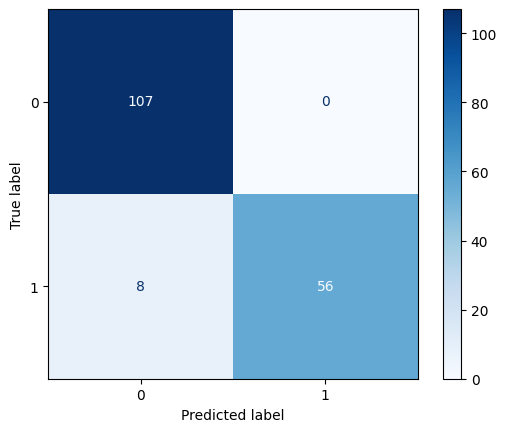

In [10]:
acc_train = rf.score(X_scaled, y_train)  # training set accuracy score
acc_test = rf.score(X_test_scaled, y_test)  # testing set accuracy score

print(f"Knearest Neighbor - Train Accuracy: {acc_train:.2f}")
print(f"Knearest Neighbor - Test Accuracy: {acc_test:.2f}")

# predicting the test set
y_pred = rf.predict(X_test_scaled)


# cross validation score
scores = cross_val_score(classes, X_scaled, y_train, cv=10, scoring='accuracy')
print("Cross-validated scores:", scores)
print('-------------------------')

# Evaluation metrics
accuracy_tree = accuracy_score(y_test, y_pred)

roc_auc_tree = roc_auc_score(y_test, y_pred)

precision_tree = precision_score(y_test, y_pred)

recall_tree = recall_score(y_test, y_pred)

f1_tree = f1_score(y_test, y_pred)

print(f"Random Forest - Accuracy: {accuracy_tree:.2f}")
print('-------------------------')
print(f"Random Forest - ROC AUC: {roc_auc_tree:.2f}")
print('-------------------------')
print(f"Random Forest - Precision: {precision_tree:.2f}")
print('-------------------------')
print(f"Random Forest - Recall: {recall_tree:.2f}")
print('-------------------------')
print(f"Random Forest - F1 Score: {f1_tree:.2f}")
print('-------------------------')


print("\nClassification Report:")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(knn, X_test_scaled, y_test, cmap='Blues')


**SAVING THE MODEL**

In [11]:
import pickle
with open('breast_model2.pkl', 'wb') as file:
    pickle.dump(knn, file)


**FEATURE IMPORTANCE**

                Feature  Coefficient
4            area_worst     1.748255
2          radius_worst     1.599267
1   concave points_mean     1.158843
7       perimeter_worst     1.091206
0  concave points_worst     0.960094
9       concavity_worst     0.408967
5             area_mean     0.116820
8        concavity_mean    -0.108614
6           radius_mean    -0.330227
3        perimeter_mean    -0.437535


<Axes: xlabel='Feature'>

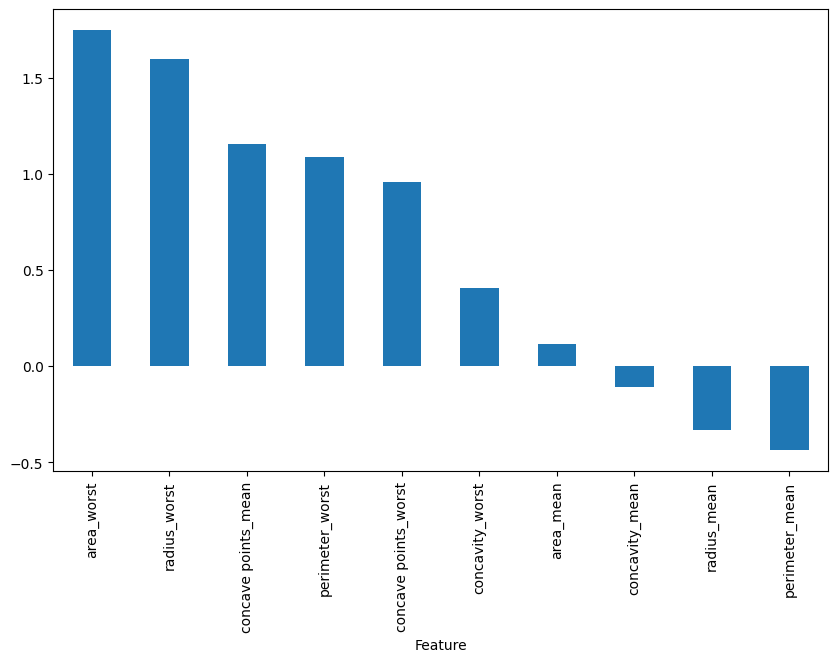

In [ ]:
import pandas as pd

coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)
coef_df.plot(kind='bar', x='Feature', y='Coefficient', legend=False, figsize=(10,6))
